In [12]:
from src.data_preprocessor import load_and_process_data, aggregate_to_yearly, load_data, filter_data
from src.time_series_analysis import group_by
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd

In [8]:
df  = load_and_process_data()

2023-11-11 20:52:28,892 - INFO - Loading the latest recent file: data/lsoa-recent.csv
2023-11-11 20:52:29,208 - INFO - Loading the latest historical file: data/lsoa-historical.csv


In [4]:
# Load the shapefile
london_boroughs = gpd.read_file("statistical-gis-boundaries-london/statistical-gis-boundaries-london/ESRI/London_Borough_Excluding_MHW.shp")
london_lsoa = gpd.read_file("statistical-gis-boundaries-london/statistical-gis-boundaries-london/ESRI/LSOA_2011_London_gen_MHW.shp")

In [5]:
london_boroughs.head()

,NAME,GSS_CODE,HECTARES,NONLD_AREA,ONS_INNER,SUB_2009,SUB_2006,geometry
0,Kingston upon Thames,E09000021,3726.117,0.000,F,None,None,"POLYGON ((516401.600 160201.800, 516407.300 16..."
1,Croydon,E09000008,8649.441,0.000,F,None,None,"POLYGON ((535009.200 159504.700, 535005.500 15..."
2,Bromley,E09000006,15013.487,0.000,F,None,None,"POLYGON ((540373.600 157530.400, 540361.200 15..."
3,Hounslow,E09000018,5658.541,60.755,F,None,None,"POLYGON ((521975.800 178100.000, 521967.700 17..."
4,Ealing,E09000009,5554.428,0.000,F,None,None,"POLYGON ((510253.500 182881.600, 510249.900 18..."


In [7]:
london_lsoa.head()

,LSOA11CD,LSOA11NM,MSOA11CD,MSOA11NM,LAD11CD,LAD11NM,RGN11CD,RGN11NM,USUALRES,HHOLDRES,COMESTRES,POPDEN,HHOLDS,AVHHOLDSZ,geometry
0,E01000001,City of London 001A,E02000001,City of London 001,E09000001,City of London,E12000007,London,1465,1465,0,112.9,876,1.7,"POLYGON ((532105.092 182011.230, 532162.491 18..."
1,E01000002,City of London 001B,E02000001,City of London 001,E09000001,City of London,E12000007,London,1436,1436,0,62.9,830,1.7,"POLYGON ((532746.813 181786.891, 532671.688 18..."
2,E01000003,City of London 001C,E02000001,City of London 001,E09000001,City of London,E12000007,London,1346,1250,96,227.7,817,1.5,"POLYGON ((532135.145 182198.119, 532158.250 18..."
3,E01000005,City of London 001E,E02000001,City of London 001,E09000001,City of London,E12000007,London,985,985,0,52.0,467,2.1,"POLYGON ((533807.946 180767.770, 533649.063 18..."
4,E01000006,Barking and Dagenham 016A,E02000017,Barking and Dagenham 016,E09000002,Barking and Dagenham,E12000007,London,1703,1699,4,116.2,543,3.1,"POLYGON ((545122.049 184314.931, 545271.917 18..."


In [16]:
yearly_df = aggregate_to_yearly(df)
filtered_df = filter_data(yearly_df, category_filters=['Violence Against the Person'])
by_borough = group_by(df=filtered_df, columns=['Borough'], sort = True)
by_lsoa = group_by(df=filtered_df, columns=['LSOA Name'], sort = True)

In [33]:
# Preparing data for merging with the shapefile
merged_borough = london_boroughs.set_index('NAME').join(by_borough)
merged_lsoa = london_lsoa.set_index('LSOA11NM').join(by_lsoa)

In [44]:
merged_borough.describe().sort_index(axis = 1)

,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,HECTARES,NONLD_AREA
count,32.000000,32.00000,32.000000,32.00,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.00000,33.000000,33.000000
mean,3309.468750,4053.46875,3974.750000,3837.25,4799.812500,5604.218750,5914.062500,6169.218750,6496.718750,6808.875000,6661.718750,7104.250000,7279.906250,5334.62500,4832.415909,64.215636
std,1122.738271,1400.71028,1288.379627,1226.35,1531.005961,1720.385698,1793.844743,1809.673482,1874.605941,1932.677747,1877.539282,2033.646479,2103.035523,1560.53673,3277.032149,99.067646
min,1236.000000,1566.00000,1664.000000,1548.00,1963.000000,2305.000000,2486.000000,2734.000000,2894.000000,2967.000000,2959.000000,2998.000000,2994.000000,2058.00000,314.942000,0.000000
25%,2433.500000,2952.50000,3136.750000,2959.50,3603.500000,4320.500000,4935.500000,4902.000000,5251.000000,5369.000000,5146.500000,5465.250000,5988.250000,4492.50000,2724.940000,0.000000
50%,3424.500000,4069.50000,4111.000000,3891.00,4990.000000,5728.000000,6078.500000,6334.000000,6714.500000,6952.500000,7008.000000,7606.500000,7515.500000,5494.50000,3857.806000,2.300000
75%,4188.250000,4919.25000,4999.750000,4908.75,5960.750000,6940.500000,7275.000000,7566.500000,7805.000000,8359.000000,8150.750000,8616.750000,8872.500000,6636.25000,5658.541000,95.600000
max,5277.000000,6973.00000,5862.000000,5646.00,7191.000000,8320.000000,8639.000000,9292.000000,9766.000000,10730.000000,10351.000000,10830.000000,10909.000000,7670.00000,15013.487000,370.619000


In [66]:
def plot_yearly_heatmap(df_shapefile, year, cutpoints=None):
    fig, ax = plt.subplots(1, 1, figsize=(15, 10))
    
    if cutpoints is not None:
        df_shapefile.plot(column=str(year), cmap='OrRd', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True, scheme='user_defined', classification_kwds={'bins':cutpoints})
    else:
        df_shapefile.plot(column=str(year), cmap='OrRd', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)
    
    ax.set_title(f'Violent Crimes in London Boroughs - {year}', fontsize=15)
    plt.axis('off')
    plt.show()

In [71]:
yearly_columns = merged_borough[['2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018',
       '2019', '2020', '2021', '2022', '2023']].stack()

quantiles = yearly_columns.quantile([0.2, 0.4, 0.6, 0.8])

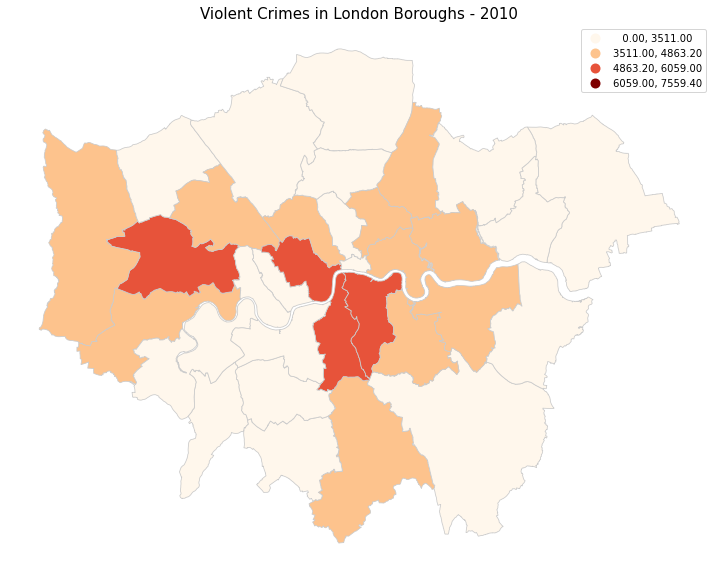

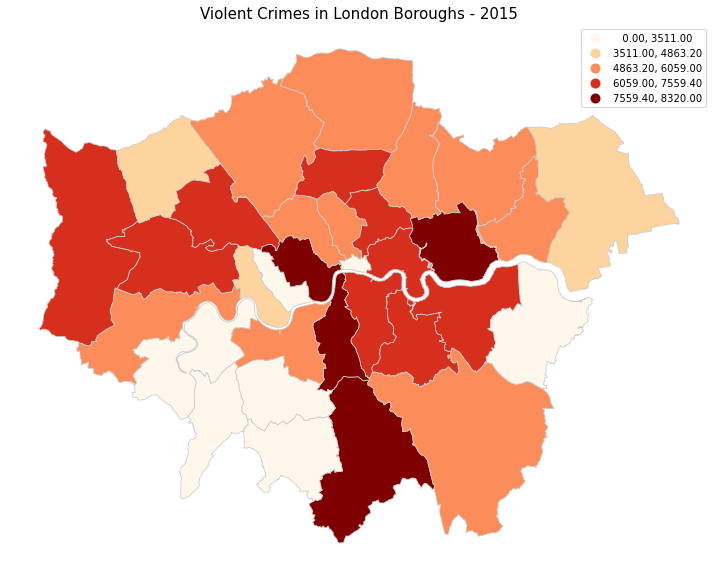

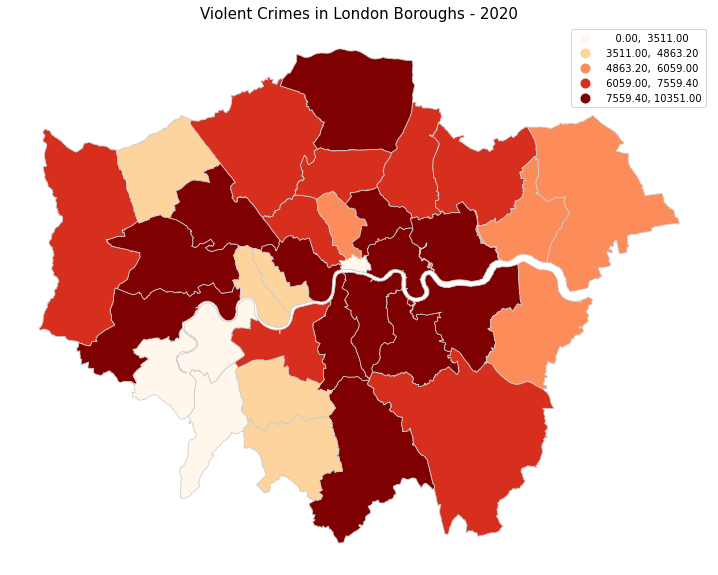

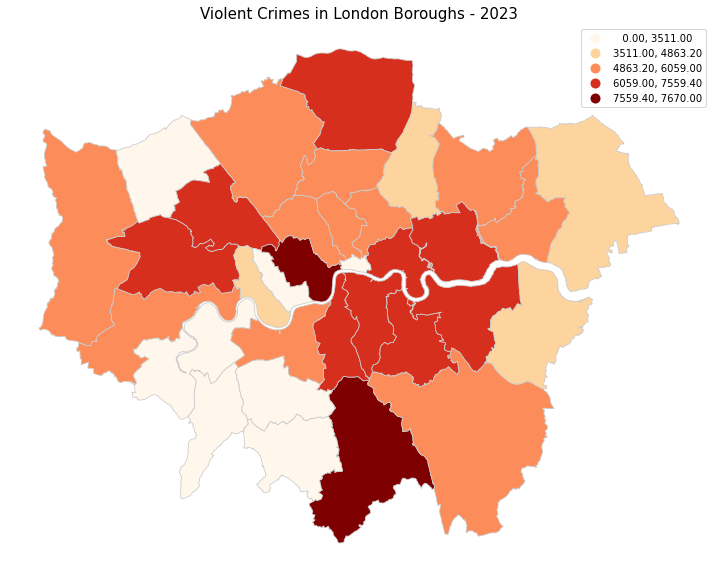

In [70]:
# Example usage with cutpoints
representative_years = ['2010', '2015', '2020', '2023']
cutpoints = [3511, 4863, 6059, 7559] 
for year in representative_years:
    plot_yearly_heatmap(merged_borough.fillna(0), year, cutpoints = quantiles.to_list())

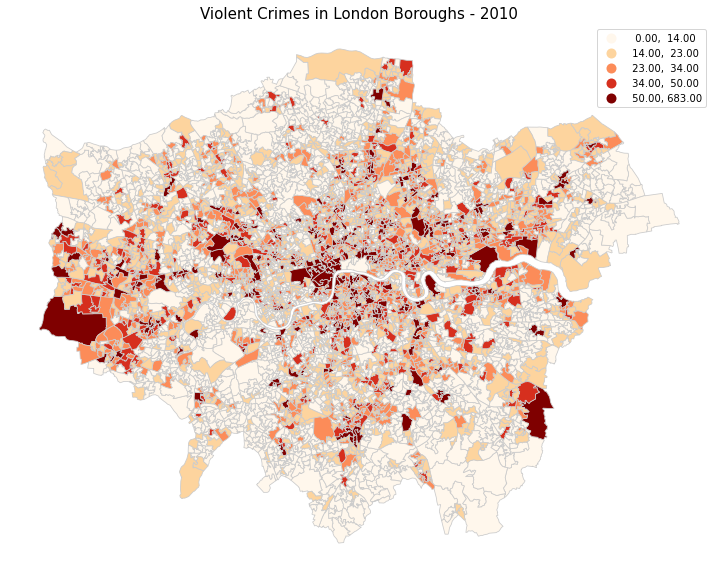

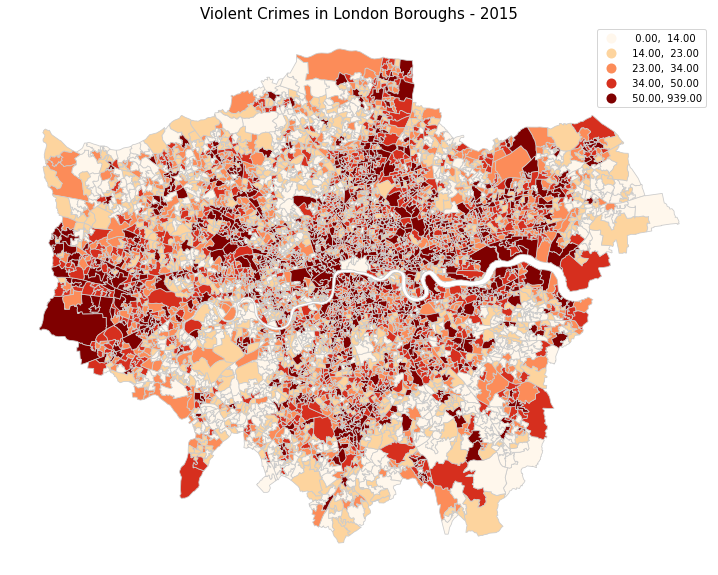

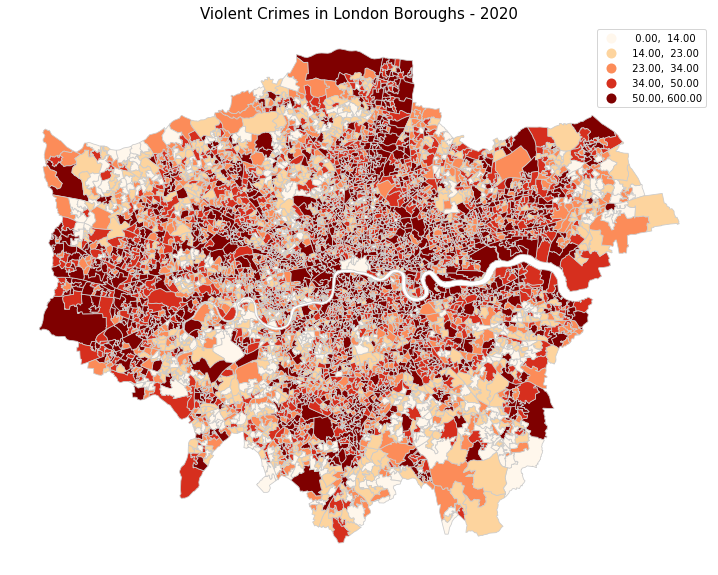

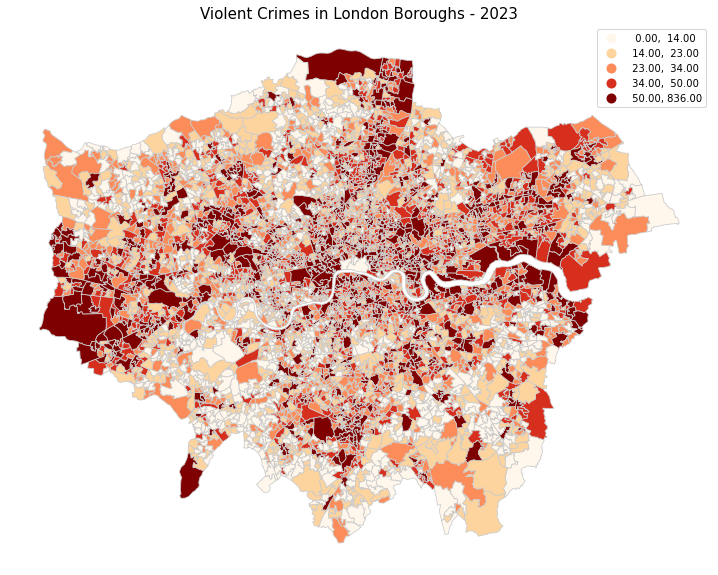

In [72]:
yearly_columns = merged_lsoa[['2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018',
       '2019', '2020', '2021', '2022', '2023']].stack()

quantiles = yearly_columns.quantile([0.2, 0.4, 0.6, 0.8])

# Example usage with cutpoints
representative_years = ['2010', '2015', '2020', '2023']
for year in representative_years:
    plot_yearly_heatmap(merged_lsoa.fillna(0), year, cutpoints = quantiles.to_list())